In [1]:
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=eb0c67af51782263ee05c5c52ee592c3e59660176262ab7e3ce8917dd07ed2dd
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import face_recognition
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face1 = face_recognition.load_image_file("/content/drive/MyDrive/araian.jpg")
face1_encoding = face_recognition.face_encodings(face1)[0]

face2 = face_recognition.load_image_file("/content/drive/MyDrive/pitbull.jpg")
face2_encoding = face_recognition.face_encodings(face2)[0]

face3 = face_recognition.load_image_file("/content/drive/MyDrive/jlo.jpg")
face3_encoding = face_recognition.face_encodings(face3)[0]


known_face_encoding = [
                      face1_encoding,
                      face2_encoding,
                      face3_encoding,

]

known_face_names = [
                    "Ariana Grande",
                    "Pitbull",
                    "Jennifer Lopez",

]



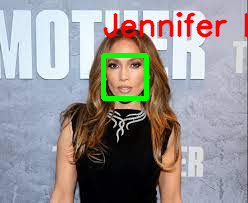

In [5]:
file_name = "/content/drive/MyDrive/unknown_jlo.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

for(top,right, bottom ,left), face_encoding in zip(face_locations,face_encodings):
  matches = face_recognition.compare_faces(known_face_encoding , face_encoding)

  name = "Unknown"

  face_distances = face_recognition.face_distance(known_face_encoding,face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]
    cv2.rectangle(unknown_image_to_draw,(left,top),(right,bottom),(0,255,0),3)
    cv2.putText(unknown_image_to_draw,name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2, cv2.LINE_AA)
cv2_imshow(unknown_image_to_draw)